In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit

# --- USER INPUT ---
fits_file = r'/home/arya/Desktop/STC_Analysis/BKG_file/2dets_bkg_iitb_20230605_timestamps.fits'  

/tmp/ipykernel_187704/2148632914.py:13: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
/tmp/ipykernel_187704/2148632914.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exp_func, x_fit, y_fit)


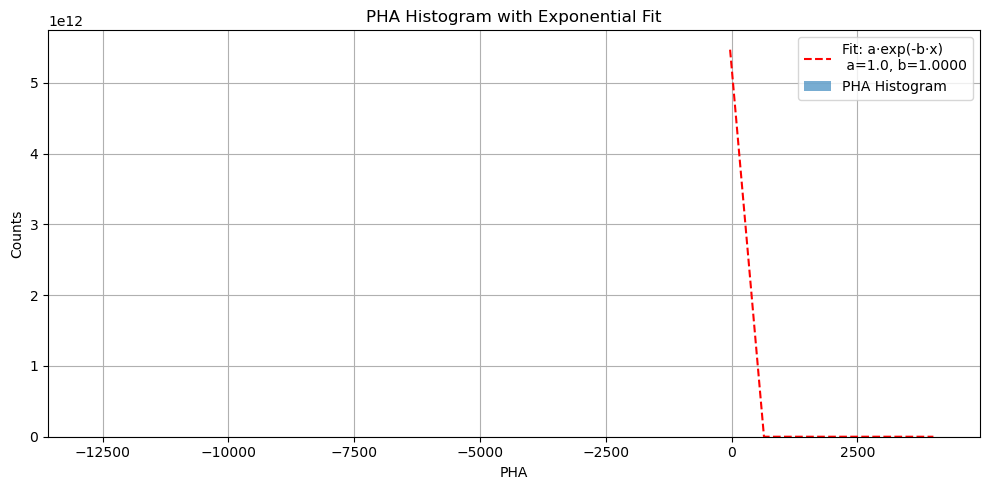

In [ ]:
      # Replace with your FITS file name
num_bins = 100                # Number of bins in PHA histogram
# ------------------

# Exponential function: a * exp(-b * x)
def exp_func(x, a, b):
    return a * np.exp(-b * x)

# Read PHA from FITS
with fits.open(fits_file) as hdul:
    pha = hdul[1].data['PHA']

# Histogram of PHA
counts, bin_edges = np.histogram(pha, bins=num_bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Fit exponential to non-zero bins
nonzero = counts > 0
x_fit = bin_centers[nonzero]
y_fit = counts[nonzero]

popt, pcov = curve_fit(exp_func, x_fit, y_fit)
a_fit, b_fit = popt

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], alpha=0.6, label='PHA Histogram')
plt.plot(x_fit, exp_func(x_fit, *popt), 'r--', label=f'Fit: a·exp(-b·x)\n a={a_fit:.1f}, b={b_fit:.4f}')
plt.xlabel('PHA')
plt.ylabel('Counts')
plt.title('PHA Histogram with Exponential Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
print(hdul[1].data['pha'])

ValueError: I/O operation on closed file

In [ ]:
# Select PHA within the window
pha_mask = (pha >= target_pha - pha_window) & (pha <= target_pha + pha_window)
selected_time = time[pha_mask]

# Time binning
time_min, time_max = np.min(selected_time), np.max(selected_time)
bins = np.arange(time_min, time_max + time_bin_size, time_bin_size)
counts, bin_edges = np.histogram(selected_time, bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Count rate = counts / time_bin_size
count_rate = counts / time_bin_size

# Plotting
plt.figure(figsize=(10, 5))
plt.step(bin_centers, count_rate, where='mid', color='blue')
plt.xlabel('Time (s)')
plt.ylabel(f'Count Rate (counts/s) at PHA ≈ {target_pha}')
plt.title('Count Rate Variation Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()
